# By-Rahul CSE

NumPy, short for Numerical Python, is one of the most important foundational pack‐ ages for numerical computing in Python. Most computational packages providing scientific functionality use NumPy’s array objects as the lingua franca for data exchange.

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data. There are a number of reasons for this:

1.NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C lan‐ guage can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.

2.NumPy operations perform complex computations on entire arrays without the need for Python for loops.

To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list:

In [1]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [2]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 14.7 ms, sys: 10.8 ms, total: 25.5 ms
Wall time: 27.3 ms


In [3]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 587 ms, sys: 156 ms, total: 743 ms
Wall time: 789 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

## The NumPy ndarray: A Multidimensional Array Object

To give you a flavor of how NumPy enables batch computations with similar syntax to scalar values on built-in Python objects, I first import NumPy and generate a small array of random data:

In [4]:
import numpy as np
data = np.random.randn(2, 3)
data

array([[ 0.74576832,  0.38418376, -0.70575805],
       [-0.21446476,  0.88067124, -1.15496593]])

In [5]:
data * 10

array([[  7.45768321,   3.84183759,  -7.05758053],
       [ -2.14464765,   8.80671238, -11.54965934]])

In [6]:
data + data

array([[ 1.49153664,  0.76836752, -1.41151611],
       [-0.42892953,  1.76134248, -2.30993187]])

I use the standard NumPy convention of always using import numpy as np. You are, of course, welcome to put from numpy import * in your code to avoid having to write np., but I advise against making a habit of this. The numpy namespace is large and contains a number of func‐ tions whose names conflict with built-in Python functions (like min and max).

An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:

In [7]:
data.shape

(2, 3)

In [8]:
data.dtype

dtype('float64')

While it’s not necessary to have a deep understanding of NumPy for many data analytical applications, becoming proficient in array-oriented programming and thinking is a key step along the way to becoming a scientific Python guru.

## Creating ndarrays

The easiest way to create an array is to use the array function. This accepts any sequence-like object (including other arrays) and produces a new NumPy array con‐ taining the passed data.

In [9]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape inferred from the data. We can confirm this by inspecting the ndim and shape attributes:

In [11]:
arr2.ndim

2

In [12]:
arr2.shape

(2, 4)

Unless explicitly specified, np.array tries to infer a good data type for the array that it creates. The data type is stored in a special dtype metadata object; for example, in the previous two examples we have:

In [13]:
arr1.dtype

dtype('float64')

In [14]:
arr2.dtype

dtype('int64')

In addition to np.array, there are a number of other functions for creating new arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a given length or shape.empty creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape:

In [15]:
np.zeros(10) #A scalar with 10 values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.zeros((3, 6)) #A Matrix with 3 rows and 6 columns

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [17]:
np.empty((2, 3, 2)) # 2 sets of 3x2 ndim Matrix

array([[[-1.72723371e-077, -1.72723371e-077],
        [ 3.45845952e-323,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000]],

       [[ 0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000]]])

It’s not safe to assume that np.empty will return an array of all zeros. In some cases, it may return uninitialized “garbage” values.

arange is an array-valued version of the built-in Python range function:

In [18]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

for a short list of standard array creation functions. Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64 (floating point).

for a short list of standard array creation functions. Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64 (floating point).

## Array creation functions

1)array

Convert input data (list, tuple, array,                       or other sequence type) to an ndarray                         either by inferring a dtype or                               explicitly specifying a dtype; copies                         the input data by default

2)asarray

Convert input to ndarray, but do not copy if the input is already an ndarray

3)arange

Like the built-inrangebut returns an ndarray instead of a list

4)ones, ones_like

Produce an array of all 1s with the given shape and dtype; ones_like takes another array and produces a ones array of the same shape and dtype

5)zeros, zeros_like

Likeonesandones_likebut producing arrays of 0s instead

6)empty,empty_like

Create new arrays by allocating new memory, but do not populate with any values like ones and zeros

7)full, full_like

Produce an array of the given shape and dtype with all values set to the indicated “fill value” full_like takes another array and produces a filled array of the same shape and dtype

8)eye, identity

Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)

## Data Types for ndarrays

1)int8, uint8

i1, u1

Signed and unsigned 8-bit (1 byte) integer types

2)int16, uint16

i2, u2

Signed and unsigned 16-bit integer types

3)int32, uint32

i4, u4

Signed and unsigned 32-bit integer types

4)int64, uint64

i8, u8

Signed and unsigned 64-bit integer types

5)float16,float32,float64,float128

 f2,f4 or f,f8 or d,f16 or g
 
 16 is half precision floating point, 32 and 64 is std single and double precision floating point,128 is Extended-precision floating point

6)complex64, complex128, complex256

c8, c16, c32

Complex numbers represented by two 32, 64, or 128 floats, respectively

7)bool

?

Boolean type storing True and False values

8)object

O

Python object type; a value can be any Python object

9)string_

S

Fixed-length ASCII string type (1 byte per character); for example, to create a string dtype with length 10, use'S10'

10)unicode_

U

Fixed-length Unicode type (number of bytes platform specific); same specification semantics asstring_(e.g.,'U10')

----------------------------------------------------------end

In [19]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [20]:
float_arr = arr.astype(np.float64) #Explicit Conversion
float_arr.dtype

dtype('float64')

In [21]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [22]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use astype to convert
them to numeric form:

In [23]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [24]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

You can also use another array’s dtype attribute:

In [25]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [26]:
empty_uint32=np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

## Arithmetic with NumPy Arrays

In [27]:
arr=np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [28]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [29]:
arr-arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [31]:
arr**0.5 #sq root

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [32]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [33]:
arr2>arr #elementwise

array([[False,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

In [34]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
arr[5]

5

In [36]:
arr[5:8]

array([5, 6, 7])

In [37]:
arr[5:8]=12

In [38]:
arr #Note the change

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

An important first dis‐ tinction from Python’s built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

To give an example of this, I first create a slice of arr:

In [39]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [40]:
arr_slice[1]=12345
arr #Notice the change

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [41]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, arr[5:8].copy()

In [42]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [43]:
arr2d[0][2]

3

In [44]:
arr2d[0,2] #Equivalent for above code

3

In 2d Array axis 0 is row and 1 is cloumn

In [45]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [46]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [47]:
old_values = arr3d[0].copy()
arr3d[0]=42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [49]:
arr3d[1, 0]

array([7, 8, 9])

In [50]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [51]:
x[0]

array([7, 8, 9])

## Indexing with slices

In [52]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [53]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [54]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [55]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [56]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [57]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [58]:
arr2d[1, :2]

array([4, 5])

In [59]:
arr2d[:2, 2]

array([3, 6])

In [60]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [61]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

Note that if you don't use : the resultant array is scalar

In [62]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [63]:
arr2d[:2,1:].shape

(2, 2)

In [64]:
arr2d[1,:2].shape #scalar

(2,)

In [65]:
arr2d[1:2,:2].shape #Vector

(1, 2)

## Boolean Indexing

I’m going to use here the randn function in numpy.random to generate some random normally distributed data:

In [66]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [67]:
data

array([[ 2.01006938, -0.34252571,  1.4879161 ,  0.7439112 ],
       [ 0.4430638 , -1.29690885,  0.3545948 , -0.69499532],
       [ 0.4151476 , -2.10052231, -0.67829464, -0.57452   ],
       [ 1.73726742,  0.01991489, -0.14427338, -0.22107172],
       [-0.24829617, -1.29489688, -2.32154832,  1.27549668],
       [-1.81502019, -1.78927311, -0.89064773,  0.84530159],
       [ 0.47073954,  0.48971648, -0.27194179,  0.43048977]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name 'Bob'. Like arithmetic operations, compari‐ sons (such as ==) with arrays are also vectorized. Thus, comparing names with the string 'Bob' yields a boolean array:

In [68]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [69]:
data[names == 'Bob']

array([[ 2.01006938, -0.34252571,  1.4879161 ,  0.7439112 ],
       [ 1.73726742,  0.01991489, -0.14427338, -0.22107172]])

Boolean selection will not fail if the boolean array is not the correct length, so I recommend care when using this feature.

In [70]:
data[names == 'Bob', 2:]

array([[ 1.4879161 ,  0.7439112 ],
       [-0.14427338, -0.22107172]])

In [71]:
data[names == 'Bob', 3]

array([ 0.7439112 , -0.22107172])

In [72]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [73]:
data[~(names == 'Bob')]

array([[ 0.4430638 , -1.29690885,  0.3545948 , -0.69499532],
       [ 0.4151476 , -2.10052231, -0.67829464, -0.57452   ],
       [-0.24829617, -1.29489688, -2.32154832,  1.27549668],
       [-1.81502019, -1.78927311, -0.89064773,  0.84530159],
       [ 0.47073954,  0.48971648, -0.27194179,  0.43048977]])

In [74]:
cond = names == 'Bob'
data[~cond]

array([[ 0.4430638 , -1.29690885,  0.3545948 , -0.69499532],
       [ 0.4151476 , -2.10052231, -0.67829464, -0.57452   ],
       [-0.24829617, -1.29489688, -2.32154832,  1.27549668],
       [-1.81502019, -1.78927311, -0.89064773,  0.84530159],
       [ 0.47073954,  0.48971648, -0.27194179,  0.43048977]])

Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like & (and) and | (or):

In [75]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [76]:
data[mask]

array([[ 2.01006938, -0.34252571,  1.4879161 ,  0.7439112 ],
       [ 0.4151476 , -2.10052231, -0.67829464, -0.57452   ],
       [ 1.73726742,  0.01991489, -0.14427338, -0.22107172],
       [-0.24829617, -1.29489688, -2.32154832,  1.27549668]])

Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

The Python keywords and and or do not work with boolean arrays. Use & (and) and | (or) instead.

In [77]:
data[data < 0] = 0
data

array([[2.01006938, 0.        , 1.4879161 , 0.7439112 ],
       [0.4430638 , 0.        , 0.3545948 , 0.        ],
       [0.4151476 , 0.        , 0.        , 0.        ],
       [1.73726742, 0.01991489, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.27549668],
       [0.        , 0.        , 0.        , 0.84530159],
       [0.47073954, 0.48971648, 0.        , 0.43048977]])

In [78]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.4430638 , 0.        , 0.3545948 , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.84530159],
       [0.47073954, 0.48971648, 0.        , 0.43048977]])

## Fancy Indexing

In [79]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i]=i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [80]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [81]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [82]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [83]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] #If you observe it carefully i have chosen in what order should i select and display elements of ndarray

array([ 4, 23, 29, 10])

In [84]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] #Display rows and columns according to your choice

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the under‐ lying data without copying anything. Arrays have the transpose method and also the special T attribute:

In [85]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [86]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [87]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 3.45157269, -1.25600464,  0.95292142],
       [-1.25600464,  3.63393231, -3.22801482],
       [ 0.95292142, -3.22801482, 10.16816393]])

In [88]:
arr = np.arange(16).reshape((2, 2, 4))
arr.shape #3d Array

(2, 2, 4)

In [89]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In 3d array first arg maps to matrices in set

            second arg maps to rows in matrix in first arg
            
            third arg maps to col's in matrix in first arg
            
you can reshape the Array according to your wish by changing these args

In [90]:
arr.transpose((1, 0, 2)) #For higher dim arrays use this

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here, the axes have been reordered with the second axis first, the first axis second, and the last axis unchanged.

In [91]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [92]:
arr.swapaxes(1, 2) #Just another method of Transpose

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes similarly returns a view on the data without making a copy.

## Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

In [93]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [95]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [96]:
x = np.random.randn(8)
y = np.random.randn(8)

In [97]:
x

array([-0.69644817, -0.9682158 ,  1.74170543,  1.56062886, -0.73120974,
       -0.58692947, -0.06835826, -0.95071986])

In [98]:
y

array([ 0.01295577, -0.21653624,  0.35901053,  1.20518468, -0.03024643,
        1.38674711,  1.48879327, -0.28344703])

In [99]:
np.maximum(x, y)

array([ 0.01295577, -0.21653624,  1.74170543,  1.56062886, -0.03024643,
        1.38674711,  1.48879327, -0.28344703])

Here, numpy.maximum computed the element-wise maximum of the elements in x and
y.

While not common, a ufunc can return multiple arrays. modf is one example, a vec‐ torized version of the built-in Python divmod; it returns the fractional and integral parts of a floating-point array:

In [100]:
arr = np.random.randn(7) * 5
arr

array([-1.07375956, -3.09906983, -8.92592743, -0.37432344, -1.84189229,
       -2.70251458,  1.75803254])

In [101]:
remainder, whole_part = np.modf(arr)

In [102]:
remainder

array([-0.07375956, -0.09906983, -0.92592743, -0.37432344, -0.84189229,
       -0.70251458,  0.75803254])

In [103]:
whole_part

array([-1., -3., -8., -0., -1., -2.,  1.])

In [104]:
arr #ufuncs have optional out arg that allows them to operate in-place on arrays

array([-1.07375956, -3.09906983, -8.92592743, -0.37432344, -1.84189229,
       -2.70251458,  1.75803254])

In [105]:
np.sqrt(arr)

<ipython-input-105-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([      nan,       nan,       nan,       nan,       nan,       nan,
       1.3259082])

In [106]:
np.sqrt(arr, arr)

<ipython-input-106-164954cb2c14>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([      nan,       nan,       nan,       nan,       nan,       nan,
       1.3259082])

In [107]:
arr

array([      nan,       nan,       nan,       nan,       nan,       nan,
       1.3259082])

## Unary ufuncs

1)abs, fabs

Compute the absolute value element-wise for integer, floating-point, or complex values

2)sqrt and square

Compute the square and sq root of each element (equivalent to arr ** 0.5) and (equivalent to arr ** 2)

3)exp

Compute the exponent ex of each element

4)log, log10, log2, log1p

Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively

5)sign

Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)

6)ceil

Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number)

7)floor

Compute the floor of each element (i.e., the largest integer less than or equal to each element)

8)rint

Round elements to the nearest integer, preserving the dtype

9)modf

Return fractional and integral parts of array as a separate array

10)isnan

Return boolean array indicating whether each value is NaN (Not a Number)

11)isfinite, isinf

Return boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively

12)cos, cosh, sin, sinh, tan, tanh

Regular and hyperbolic trigonometric functions

13)arccos, arccosh, arcsin, arcsinh, arctan, arctanh

Inverse trigonometric functions

14)logical_not

Compute truth value of not x element-wise (equivalent to ~arr).

## Binary universal functions

1)add

Add corresponding elements in arrays

2)subtract

Subtract elements in second array from first array

3)multiply

Multiply array elements

4)divide, floor_divide

Divide or floor divide (truncating the remainder)

5)power

Raise elements in first array to powers indicated in second array

6)maximum, fmax

Element-wise maximum; fmax ignores NaN

7)minimum, fmin

Element-wise minimum; fmin ignores NaN

8)mod

Element-wise modulus (remainder of division)

9)copysign

Copy sign of values in second argument to values in first argument

10)greater, greater_equal, less, less_equal, equal, not_equal

Perform element-wise comparison, yielding boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)

11)logical_and, logical_or, logical_xor

Compute element-wise truth value of logical operation (equivalent to infix operators &|,^)

## Array-Oriented Programming with Arrays

In [108]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

The np.meshgrid function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [109]:
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now find radius of circle

In [110]:
z=np.sqrt(xs**2+ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

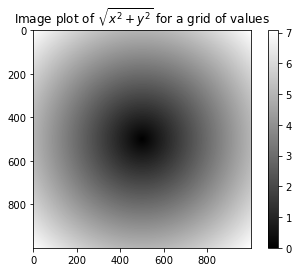

In [111]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

Here I used the matplotlib function imshow to create an image plot
from a two-dimensional array of function values.

## Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if con dition else y. Suppose we had a boolean array and two arrays of values:

In [112]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [113]:
result = [(x if c else y)for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With np.where you can write this very concisely:

In [114]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to np.where don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is very easy to do with np.where:

In [115]:
arr = np.random.randn(4, 4)
arr

array([[ 1.16387919,  0.96598115, -0.4099598 , -0.43601191],
       [-1.37512566, -0.59100687, -0.15363321,  1.25408893],
       [ 0.30006201, -2.13828653, -0.61101237,  1.96157957],
       [-0.3046559 ,  0.12434101,  0.93266517,  0.53843432]])

In [116]:
arr>0

array([[ True,  True, False, False],
       [False, False, False,  True],
       [ True, False, False,  True],
       [False,  True,  True,  True]])

In [117]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [-2,  2,  2,  2]])

In [118]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        ,  2.        , -0.4099598 , -0.43601191],
       [-1.37512566, -0.59100687, -0.15363321,  2.        ],
       [ 2.        , -2.13828653, -0.61101237,  2.        ],
       [-0.3046559 ,  2.        ,  2.        ,  2.        ]])

## Mathematical and Statistical Methods

In [119]:
arr = np.random.randn(5, 4)
arr

array([[ 1.33634583, -0.85454846, -1.17179126,  0.51164917],
       [-2.09503373, -2.17163248,  1.14009241, -0.96145071],
       [-1.59482286, -0.54942237, -0.17249176, -0.87964585],
       [ 0.17735782,  1.1285982 ,  0.28622981,  0.61362619],
       [ 0.40112899,  0.19717773, -0.70677608,  0.39643943]])

In [120]:
arr.mean()

-0.24844849962062993

In [121]:
np.mean(arr)

-0.24844849962062993

In [122]:
arr.sum()

-4.968969992412599

In [123]:
arr.mean(axis=1)

array([-0.04458618, -1.02200613, -0.79909571,  0.55145301,  0.07199252])

In [124]:
arr.sum(axis=0)

array([-1.77502396, -2.24982738, -0.62473689, -0.31938177])

Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0) means “compute sum down the rows.”

In [125]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [126]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [127]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [128]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## Basic array statistical methods

1)sum

Sum of all the elements in the array or along an axis; zero-length arrays have sum 0

2)mean

Arithmetic mean; zero-length arrays have NaN mean

3)std, var

Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n)

4)min, max

Minimum and maximum

5)argmin, argmax

Indices of minimum and maximum elements, respectively

6)cumsum

Cumulative sum of elements starting from 0

7)cumprod

Cumulative product of elements starting from 1

## Methods for Boolean Arrays

In [129]:
arr = np.random.randn(100)
(arr>0).sum() #Number of positive values

46

There are two additional methods, any and all, useful especially for boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True:

In [130]:
bools = np.array([False, False, True, False])
bools.any()

True

In [131]:
bools.all()

False

These methods also work with non-boolean arrays, where non-zero elements evaluate to True.

## Sorting

In [132]:
arr = np.random.randn(6)
arr

array([ 1.36260744, -0.70738326, -0.68919885,  0.2076594 ,  1.17173146,
        0.3813876 ])

In [133]:
arr.sort()
arr

array([-0.70738326, -0.68919885,  0.2076594 ,  0.3813876 ,  1.17173146,
        1.36260744])

In [134]:
arr = np.random.randn(5, 3)
arr

array([[ 1.7541557 ,  0.07959548, -1.09339944],
       [-0.52119211, -3.20291597,  0.68494599],
       [-1.22742064, -0.89256263,  0.51268806],
       [ 0.42093619, -0.03147995,  0.59355504],
       [-0.57517973, -1.13721459,  1.59166135]])

In [135]:
arr.sort(1) #Axis=1
arr

array([[-1.09339944,  0.07959548,  1.7541557 ],
       [-3.20291597, -0.52119211,  0.68494599],
       [-1.22742064, -0.89256263,  0.51268806],
       [-0.03147995,  0.42093619,  0.59355504],
       [-1.13721459, -0.57517973,  1.59166135]])

In [136]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5950510865246044

## Unique and Other Set Logic

In [137]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [138]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [139]:
sorted(set(names)) #Python alternative of np.unique

['Bob', 'Joe', 'Will']

In [140]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## Array set operations

1)unique(x)

Compute the sorted, unique elements in x

2)intersect1d(x,y)

Compute the sorted,common elements in x and y

3)union1d(x, y)

Compute the sorted union of elements

4)in1d(x, y)

Compute a boolean array indicating whether each element ofxis contained iny

5)setdiff1d(x, y)

Set difference, elements inxthat are not iny

6)setxor1d(x, y)

Set symmetric differences; elements that are in either of the arrays, but not both

## Linear Algebra

In [141]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [142]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [143]:
x.dot(y) #equivalent to np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one dimensional array results in a one-dimensional array:

In [144]:
np.dot(x, np.ones(3)) #equivalent to x @ np.ones(3)

array([ 6., 15.])

In [145]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 9.66013155, -6.9008361 , -1.50590444, -0.7394957 ,  3.82108989],
       [-6.9008361 ,  5.81188629,  1.53451379,  0.49064186, -2.6178778 ],
       [-1.50590444,  1.53451379,  0.67311152,  0.19527201, -0.45990211],
       [-0.7394957 ,  0.49064186,  0.19527201,  0.48793791, -0.13844151],
       [ 3.82108989, -2.6178778 , -0.45990211, -0.13844151,  1.72228101]])

In [146]:
mat.dot(inv(mat)) #Identity matrix formula

array([[ 1.00000000e+00, -1.84618868e-16, -6.13389824e-16,
        -6.60995114e-17,  7.30554833e-16],
       [ 2.98689844e-15,  1.00000000e+00,  4.36742747e-16,
         2.19264170e-17,  1.11255137e-15],
       [-4.16317718e-15,  2.08305200e-16,  1.00000000e+00,
         8.64998977e-17, -1.51201073e-15],
       [-4.02700386e-16, -7.60441494e-17, -1.08833038e-16,
         1.00000000e+00, -2.20636151e-16],
       [ 1.51312401e-16, -3.87659619e-15,  4.40902285e-16,
        -1.80850663e-16,  1.00000000e+00]])

In [147]:
q, r = qr(mat)
r

array([[-5.17617883, -2.3951936 ,  0.77864871, -4.12225121,  8.13007049],
       [ 0.        , -3.7189316 ,  6.82760492, -0.17751422, -4.0838085 ],
       [ 0.        ,  0.        , -1.57890759,  1.00147763, -0.51509576],
       [ 0.        ,  0.        ,  0.        , -1.96367661, -0.35893779],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.20141103]])

In [148]:
q

array([[-0.53218337, -0.09131153, -0.33113166,  0.08059683,  0.76960966],
       [-0.31186394, -0.53313791, -0.58303087, -0.02380666, -0.52726947],
       [ 0.09949359,  0.73247628, -0.63032671, -0.21837483, -0.09262936],
       [-0.33231379, -0.01267069,  0.25165307, -0.90846037, -0.02788365],
       [ 0.70653401, -0.41321196, -0.29964278, -0.3463374 ,  0.3468864 ]])

## numpy.linalg functions

1)diag

Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal

2)dot

Matrix multiplication

3)trace

Compute the sum of the diagonal elements

4)det

Compute the matrix determinant

5)eig

Compute the eigenvalues and eigenvectors of a square matrix

6)inv

Compute the inverse of a square matrix

7)pinv

Compute the Moore-Penrose pseudo-inverse of a matrix

8)qr

Compute the QR decomposition

9)svd

Compute the singular value decomposition (SVD)

10)solve

Solve the linear system Ax = b for x, where A is a square matrix

11)lstsq

Compute the least-squares solution to Ax = b

## That's all for now peeps, now you're good to learn more about NumPy on your own and thank's for going through this tutorial.